# Проект: Построение ML-моделей для HR-аналитики


## Вводная часть

### Описание проекта

HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.

Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. 
Собирать данные такими опросниками не так легко: компания большая, и всех сотрудников надо сначала оповестить об опросе, а затем проследить, что все его прошли. 


**ЗАДАЧА 1:** Построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика;

**ЗАДАЧА 2:** Построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

### Описание данных


Данные с признаками:
- **id** — уникальный идентификатор сотрудника;
- **dept** — отдел, в котором работает сотрудник;
- **level** — уровень занимаемой должности;
- **workload** — уровень загруженности сотрудника;
- **employment_years** — длительность работы в компании (в годах);
- **last_year_promo** — показывает, было ли повышение за последний год;
- **last_year_violations** — показывает, нарушал ли сотрудник трудовой договор за последний год;
- **supervisor_evaluation** — оценка качества работы сотрудника, которую дал руководитель;
- **salary** — ежемесячная зарплата сотрудника;
- **job_satisfaction_rate** — уровень удовлетворённости сотрудника работой в компании, целевой признак.



**Задача 1: предсказание уровня удовлетворённости сотрудника**

Три датасета:

- Тренировочная выборка - **train_job_satisfaction_rate.csv**
- Входные признаки тестовой выборки - **test_features.csv**
- Целевой признак тестовой выборки - **test_target_job_satisfaction_rate.csv**

**Задача 2: предсказание увольнения сотрудника из компании**

Три датасета:

- Тренировочная выборка - **train_quit.csv**
- Входные признаки тестовой выборки те же, что и в задаче 1 - **test_features.csv**
- Целевой признак тестовой выборки - **test_target_quit.csv**

### Цель проекта

1. Построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика;
2. Построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

### План проекта

**Задача 1:** 
1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Подготовка данных
5. Обучение моделей
6. Общий вывод

**Задача 2:**
1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Добавление нового входного признака
5. Подготовка данных
6. Обучение моделей
7. Общий вывод



## Импорт библиотек

In [1]:
!pip install phik
!pip install -U scikit-learn

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import PercentFormatter
from phik import phik_matrix
from phik.report import plot_correlation_matrix

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import (
    OneHotEncoder, 
    OrdinalEncoder, 
    StandardScaler, 
    MinMaxScaler, 
    RobustScaler, 
    LabelEncoder
)
from sklearn.impute import SimpleImputer 
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, make_scorer

In [3]:
RANDOM_STATE = 42

## Задача 1: Предсказание уровня удовлетворённости сотрудника

### Задача 1: Загрузка данных

#### Общая информация о данных

In [4]:
train_job_sf = pd.read_csv('/datasets/train_job_satisfaction_rate.csv', sep=',')
test_features = pd.read_csv('/datasets/test_features.csv', sep=',')
test_target_job_sf_rate = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv', sep=',')

In [5]:
def general_info_data(df):
    display(df.head())
    display(df.info())

Тренировочная выборка:

In [6]:
general_info_data(train_job_sf)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


None

Входные признаки тестовой выборки:

In [7]:
general_info_data(test_features)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


None

Целевой признак тестовой выборки:

In [8]:
general_info_data(test_target_job_sf_rate)

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


None

**ВЫВОД:**

Тренировочная выборка: 
- содержит 4000 строк;
- пропуски в столбцах `dept` и `level`;
- типы данных в столбцах указаны корректно.

Входные признаки тестовой выборки:
- содержит 2000 строк;
- пропуски в столбцах `dept` и `level`;
- типы данных в столбцах указаны корректно.

Целевой признак тестовой выборки:
- содержит 2000 строк;
- пропусков нет;
- типы данных в столбцах указаны корректно.

### Задача 1: Предобработка данных

#### Проверка на дубликаты

##### Проверка на явные дубликаты

In [9]:
train_job_sf.duplicated().sum()

0

In [10]:
test_features.duplicated().sum()

0

In [11]:
test_target_job_sf_rate.duplicated().sum()

0

**ВЫВОД:**

Явных дубликатов не обнаружено

##### Проверка на неявные дубликаты

In [12]:
df_columns = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']

for i in df_columns:
    print(train_job_sf[i].value_counts(),'\n')

sales         1512
technology     866
purchasing     610
marketing      550
hr             456
Name: dept, dtype: int64 

junior    1894
middle    1744
sinior     358
Name: level, dtype: int64 

medium    2066
low       1200
high       734
Name: workload, dtype: int64 

no     3880
yes     120
Name: last_year_promo, dtype: int64 

no     3441
yes     559
Name: last_year_violations, dtype: int64 



In [13]:
for i in df_columns:
    print(test_features[i].value_counts(),'\n')

sales         763
technology    455
marketing     279
purchasing    273
hr            227
                1
Name: dept, dtype: int64 

junior    974
middle    854
sinior    171
Name: level, dtype: int64 

medium    1043
low        593
high       363
             1
Name: workload, dtype: int64 

no     1937
yes      63
Name: last_year_promo, dtype: int64 

no     1738
yes     262
Name: last_year_violations, dtype: int64 



**ВЫВОД:**

Неявных дубликатов не обнаружено

#### Поиск пропущенных значений

Тренировочная выборка:

In [14]:
train_job_sf.isna().sum()

id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

In [15]:
df_col_train = ['id',
                'dept', 
                'level', 
                'workload', 
                'employment_years', 
                'last_year_promo', 
                'last_year_violations',
                'supervisor_evaluation', 
                'salary', 
                'job_satisfaction_rate']

In [16]:
for i in df_col_train:
    print(f'{i}:', train_job_sf[i].unique())

id: [155278 653870 184592 ... 533318 706868 338347]
dept: ['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
level: ['junior' 'middle' 'sinior' nan]
workload: ['medium' 'high' 'low']
employment_years: [ 2  1  4  7  9  6  3 10  8  5]
last_year_promo: ['no' 'yes']
last_year_violations: ['no' 'yes']
supervisor_evaluation: [1 5 2 3 4]
salary: [24000 38400 12000 18000 22800 30000 56400 52800 13200 54000 19200 40800
 34800 27600 26400 33600 50400 15600 14400 25200 72000 31200 32400 48000
 43200 46800 58800 84000 44400 39600 37200 21600 28800 62400 60000 42000
 49200 55200 57600 68400 45600 51600 64800 80400 20400 61200 76800 69600
 16800 36000 63600 81600 66000 74400 67200 70800 73200 75600 79200 94800
 78000 88800 92400 85200 91200 98400 96000 97200]
job_satisfaction_rate: [0.58 0.76 0.11 0.37 0.2  0.78 0.56 0.44 0.14 0.47 0.74 0.42 0.32 0.57
 0.16 0.69 0.33 0.64 0.39 0.8  0.79 0.17 0.65 0.18 0.19 0.49 0.63 0.22
 0.23 0.5  0.35 0.3  0.77 0.88 0.59 0.21 0.36 0.85 0.7  0.48 0.6  0.1
 0.

В столбце `level` опечатка. Исправим написание значений в столбцах:

In [17]:
train_job_sf['level'] = train_job_sf['level'].replace('sinior', 'senior')
train_job_sf['level'].value_counts()

junior    1894
middle    1744
senior     358
Name: level, dtype: int64

Входные признаки тестовой выборки:

In [18]:
test_features.isna().sum()

id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

In [19]:
df_col_test = ['id',
               'dept', 
               'level', 
               'workload',
               'employment_years', 
               'last_year_promo', 
               'last_year_violations',
               'supervisor_evaluation', 
               'salary']

In [20]:
for i in df_col_test:
    print(f'{i}:',test_features[i].unique())

id: [485046 686555 467458 ... 305653 160233 771859]
dept: ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan ' ']
level: ['junior' 'middle' 'sinior' nan]
workload: ['medium' 'low' 'high' ' ']
employment_years: [ 2  1  5  6  3  9  7  4  8 10]
last_year_promo: ['no' 'yes']
last_year_violations: ['no' 'yes']
supervisor_evaluation: [5 4 3 1 2]
salary: [28800 30000 19200 40800 42000 26400 49200 62400 14400 36000 33600 44400
 27600 12000 64800 20400 34800 15600 18000 50400 31200 51600 16800 43200
 52800 32400 37200 58800 24000 21600 48000 45600 25200 63600 61200 56400
 38400 46800 55200 13200 39600 54000 57600 68400 22800 72000 81600 60000
 66000 67200 70800 76800 79200 69600 94800 82800 80400 87600 86400 96000
 78000 75600 73200 84000 88800 92400]


In [21]:
test_features['dept'] = test_features['dept'].replace(' ', np.nan)
test_features['workload'] = test_features['workload'].replace(' ', np.nan)

В столбце `level` опечатка. Исправим написание значений в столбцах:

In [22]:
test_features['level'] = test_features['level'].replace('sinior', 'senior')
test_features['level'].value_counts()

junior    974
middle    854
senior    171
Name: level, dtype: int64

Целевой признак тестовой выборки:

In [23]:
test_target_job_sf_rate.isna().sum()

id                       0
job_satisfaction_rate    0
dtype: int64

In [24]:
test_target_job_sf_rate['job_satisfaction_rate'].unique()

array([0.74, 0.75, 0.6 , 0.72, 0.08, 0.76, 0.64, 0.38, 0.14, 0.59, 0.91,
       0.78, 0.7 , 0.79, 0.34, 0.81, 0.23, 0.4 , 0.58, 0.77, 0.68, 0.24,
       0.42, 0.69, 0.47, 0.35, 0.71, 0.83, 0.61, 0.65, 0.37, 0.45, 0.63,
       0.82, 0.16, 0.89, 0.28, 0.32, 0.88, 0.36, 0.33, 0.31, 0.27, 0.73,
       0.53, 0.26, 0.57, 0.2 , 1.  , 0.56, 0.67, 0.19, 0.52, 0.43, 0.12,
       0.11, 0.21, 0.13, 0.49, 0.22, 0.86, 0.46, 0.41, 0.48, 0.29, 0.87,
       0.66, 0.8 , 0.55, 0.5 , 0.51, 0.62, 0.85, 0.84, 0.15, 0.39, 0.25,
       0.9 , 0.07, 0.1 , 0.92, 0.3 , 0.44, 0.18, 0.93, 0.54, 0.96, 0.09,
       0.99, 0.17, 0.95, 0.06, 0.94, 0.03, 0.98, 0.97, 0.04, 0.05])

**ВЫВОД:**

Пустые значения заменили на nan. Далее обработаем пропуски в пайплайне. Опечатка исправлена.

### Задача 1: Исследовательский анализ данных


#### Анализ тренировочной выборки

In [25]:
train_job_sf.describe()

,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,544957.621000,3.718500,3.476500,33926.700000,0.533995
std,257883.104622,2.542513,1.008812,14900.703838,0.225327
min,100954.000000,1.000000,1.000000,12000.000000,0.030000
25%,322836.750000,2.000000,3.000000,22800.000000,0.360000
50%,534082.500000,3.000000,4.000000,30000.000000,0.560000
75%,771446.000000,6.000000,4.000000,43200.000000,0.710000
max,999521.000000,10.000000,5.000000,98400.000000,1.000000


In [26]:
columns_cat = ['dept', 
               'level',
               'workload',
               'employment_years',
               'last_year_promo',
               'last_year_violations', 
               'supervisor_evaluation']

name_cat = ['Отдел, в котором работает сотрудник',
            'Уровень занимаемой должности', 
            'Уровень загруженности сотрудника',
            'Длительность работы в компании (в годах)',
            'Повышение за последний год', 
            'Нарушение трудового договора за последний год', 
            'Оценка качества работы сотрудника, которую дал руководитель']

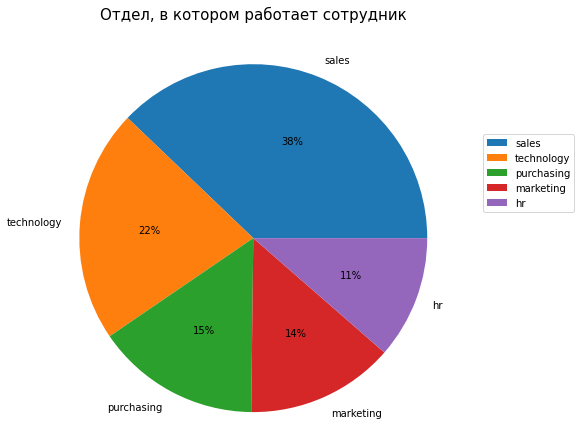

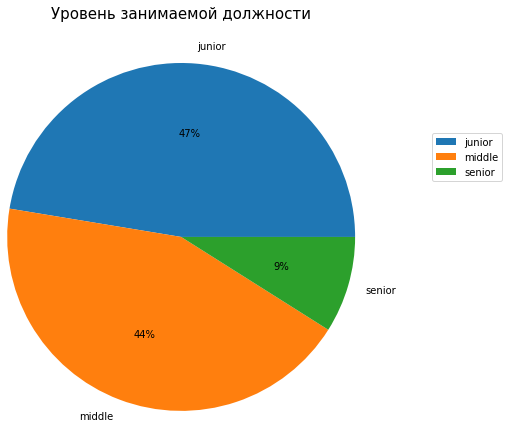

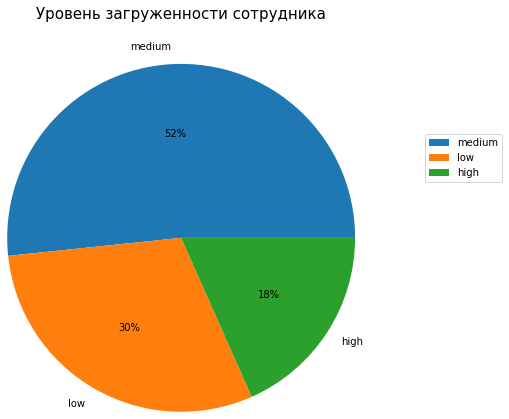

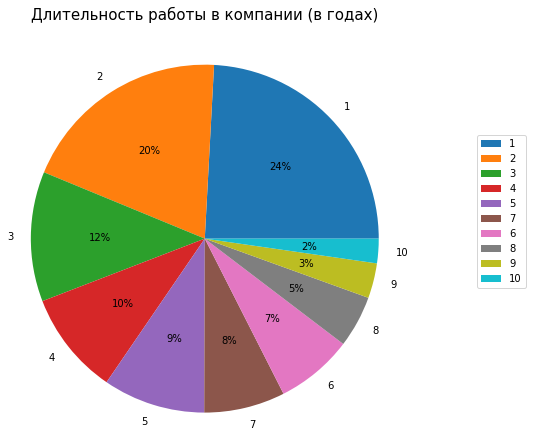

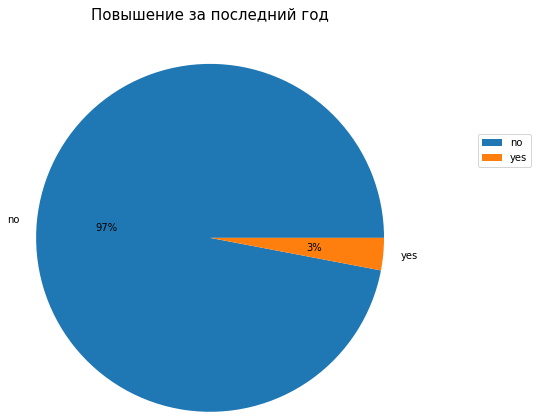

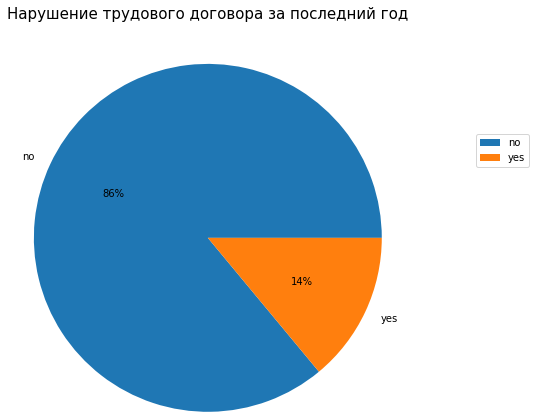

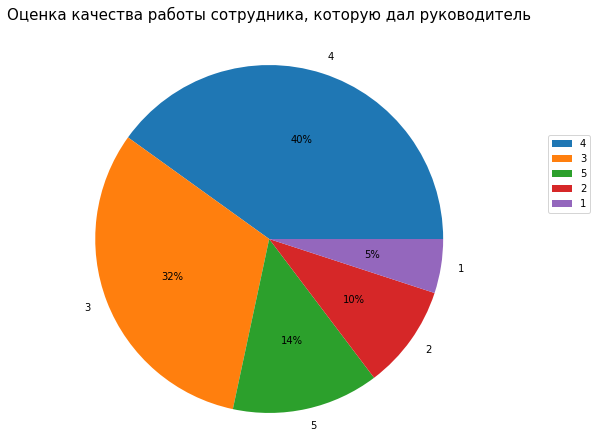

In [27]:
for i, j in zip(columns_cat, name_cat):
    train_job_sf[i].value_counts().plot(y = 'count', kind = 'pie', radius = 2, autopct='%1.0f%%')
    plt.title(j, fontsize=15, pad=110)
    plt.legend(bbox_to_anchor=(2,1))
    plt.ylabel(' ')
    plt.show()

**ВЫВОД:**

- 38% сотрудников работают в отделе продаж, 22% в технологическом отделе, в отделах закупок и маркетинга работает примерно одинаковое количество сотрудников (15% и 14% соответственно), в HR-отделе работают 11% сотрудников;
- По уровню занимаемой должности сотрудникипочти в равных долях представляют категории junior и middle (47% и 44% соответственно). Senior - 9%;
- 30% сотрудников загружены мало, 52% - средне, 18% оценили свою загруженность как высокую;
- Большинство сотрудников работают 1-2 года (24% и 20% соответственно), 3-4 года - 12% и 10% соответственно, далее количество сотрудников уменьшается до 2% (10 лет);
- Повышение за последний год было у 3% сотрудников;
- Трудовой договор за последний год нарушили 14% сотрудников;
- Руководитель оценил качества работы 40% сотрудников на 4 балла, 32% - 3 балла, 5 баллов получили 14% сотрудников, 1-2 балла получили 5% и 10% соответственно.

In [28]:
columns_col = ['salary', 
               'job_satisfaction_rate']

name_col = ['Ежемесячная зарплата сотрудника',
            'Уровень удовлетворённости сотрудника работой в компании']

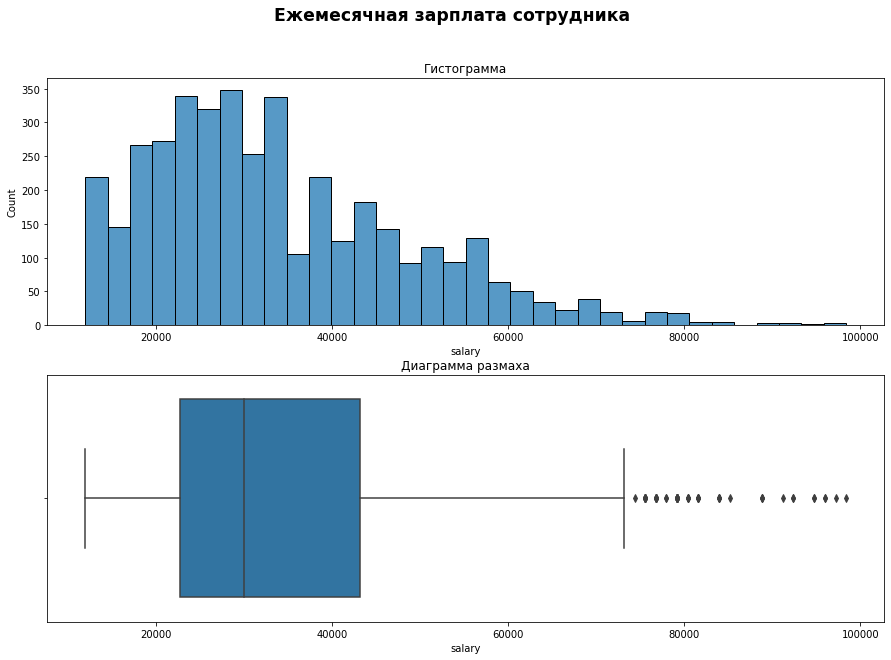

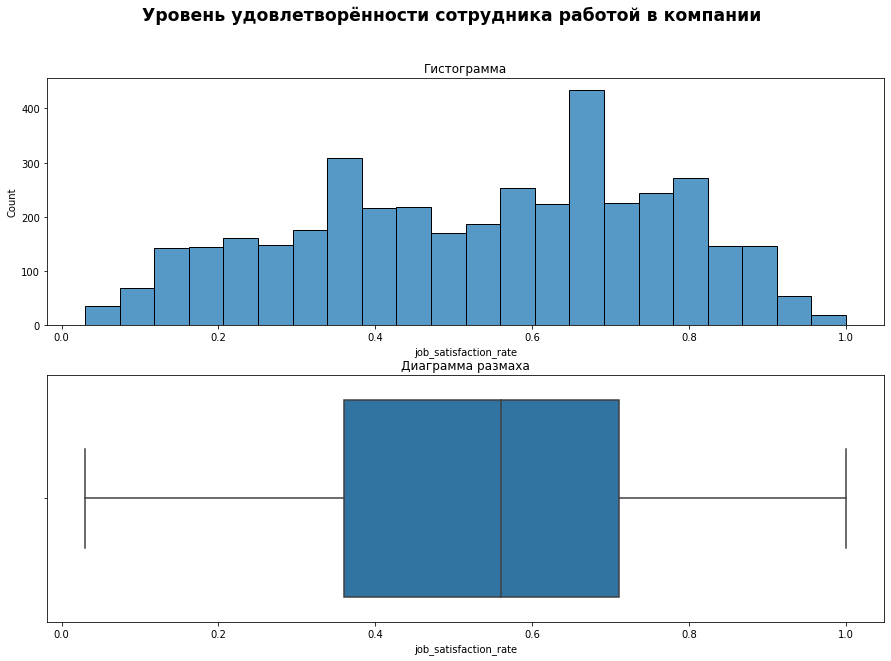

In [29]:
for i, j in zip(columns_col, name_col):
    fig, axs = plt.subplots(nrows=2, ncols=1, figsize = (15,10))
    
    sns.histplot(data = train_job_sf, x = i, ax=axs[0])
    axs[0].set_title('Гистограмма')
    
    sns.boxplot(data = train_job_sf, x = i, ax=axs[1])
    axs[1].set_title('Диаграмма размаха')
       
    fig.suptitle(j, fontsize = 'xx-large', fontweight = 600)
    plt.show()

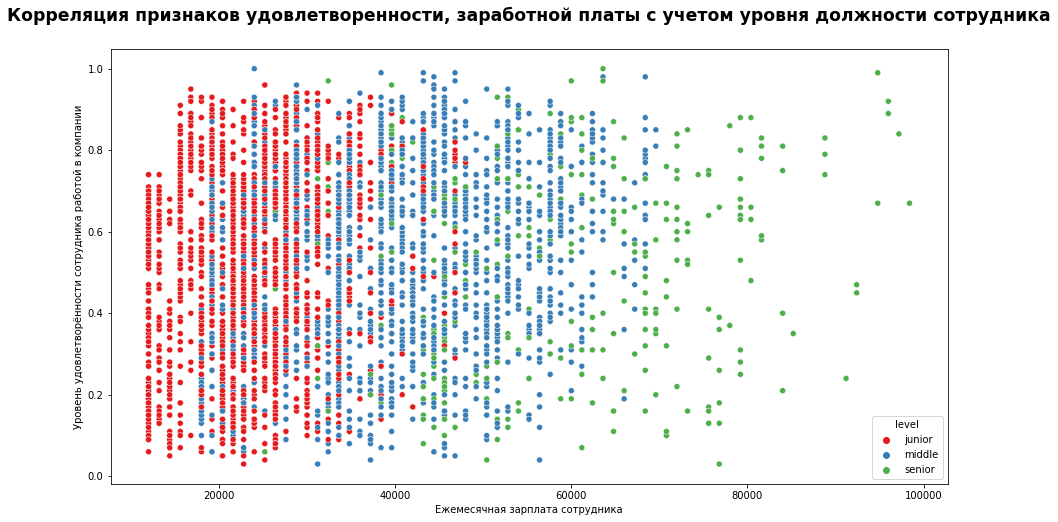

In [30]:
fig = plt.subplots(figsize = (15,8))

sns.scatterplot(data=train_job_sf, x='salary', y = 'job_satisfaction_rate', hue = 'level', palette = 'Set1')

plt.title('Корреляция признаков удовлетворенности, заработной платы с учетом уровня должности сотрудника', 
          fontsize = 'xx-large', 
          fontweight = 600,
          y = 1.05)
plt.xlabel('Ежемесячная зарплата сотрудника')
plt.ylabel('Уровень удовлетворённости сотрудника работой в компании')
plt.show()

**ВЫВОД:**

- Уровень ежемесячной зарплаты сотрудников находится в диапазоне от 22800 до 43200. Медианное значение - 30000. Выбросы на диаграмме размаха - зарплаты сотрудников уровня senior.
- Уровень удовлетворенности не зависит от уровня занимаемой должности и уровня заработной платы. 

In [31]:
train_job_sf.set_index('id', inplace=True)

In [32]:
interval_cols = ['salary', 'job_satisfaction_rate']

In [33]:
phik_overview = phik_matrix(train_job_sf, interval_cols=interval_cols)

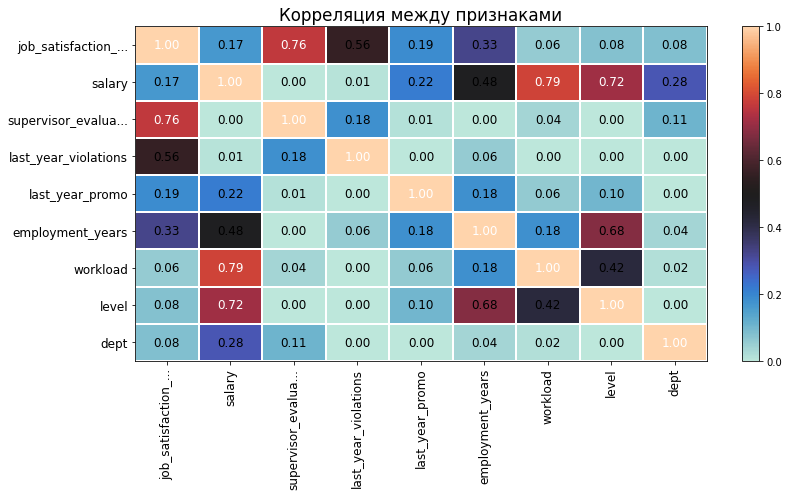

In [34]:
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='icefire',
    title=r'Корреляция между признаками',
    fontsize_factor=1.2,
    figsize=(12, 7)
) 

**ВЫВОД:**

- Высокие коэффициенты корреляции между признаками уровня загруженности сотрудника и ежемесячной заработной платы (0.79);
- Коэффициент корреляции  между признаками уровня занимаемой должности и ежемесячной заработной платы(0.72);
- Оценка качества работы сотрудника, которую дал руководитель коррелирует с уровнем удовлетворенности сотрудника работой в компании (0.76);
- Мультиколлинеарность между входными признаками не наблюдается, т.к. значения коэффициента корреляции от 0.9 до 0.95 по модулю отсутствуют. 

#### Анализ тестовой выборки

In [35]:
test_features.describe()

,id,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,552765.213500,3.666500,3.526500,34066.800000
std,253851.326129,2.537222,0.996892,15398.436729
min,100298.000000,1.000000,1.000000,12000.000000
25%,339052.000000,1.000000,3.000000,22800.000000
50%,550793.000000,3.000000,4.000000,30000.000000
75%,765763.750000,6.000000,4.000000,43200.000000
max,999029.000000,10.000000,5.000000,96000.000000


In [36]:
columns_cat = ['dept', 
               'level',
               'workload',
               'employment_years',
               'last_year_promo',
               'last_year_violations', 
               'supervisor_evaluation']

name_cat = ['Отдел, в котором работает сотрудник',
            'Уровень занимаемой должности', 
            'Уровень загруженности сотрудника',
            'Длительность работы в компании (в годах)',
            'Повышение за последний год', 
            'Нарушение трудового договора за последний год', 
            'Оценка качества работы сотрудника, которую дал руководитель']

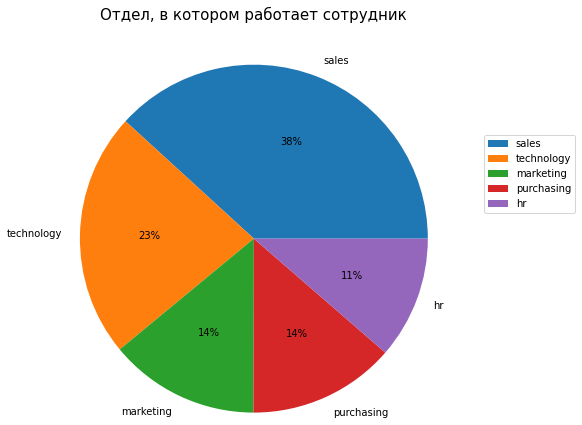

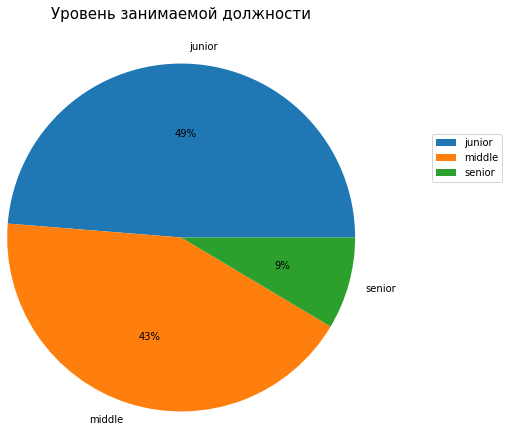

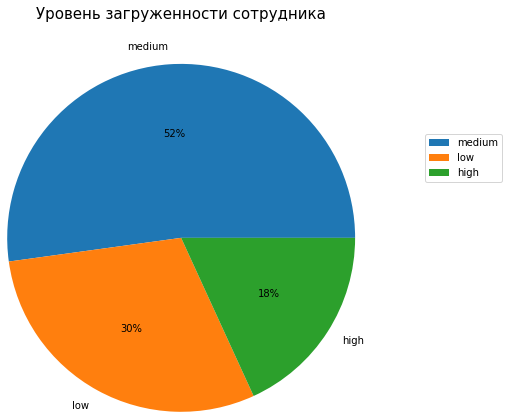

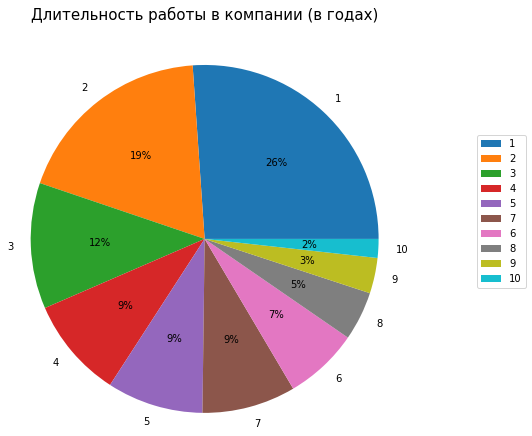

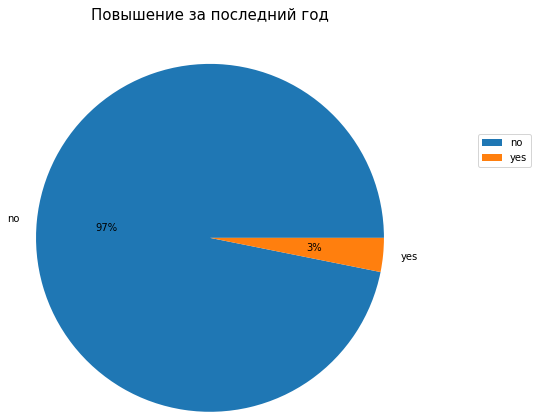

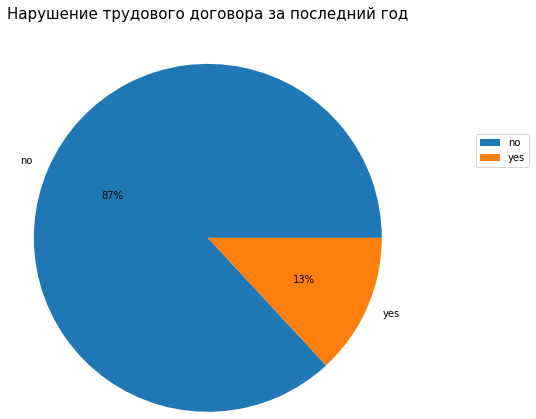

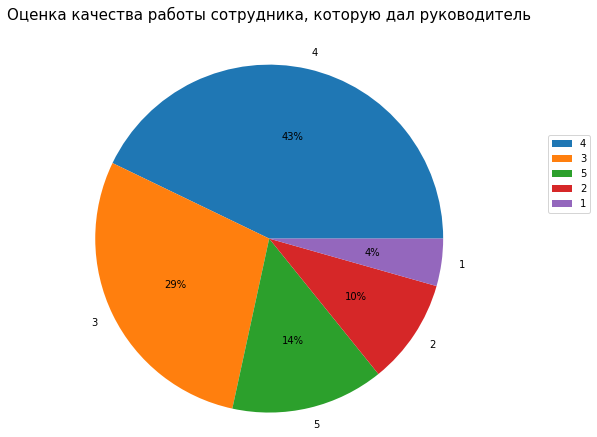

In [37]:
for i, j in zip(columns_cat, name_cat):
    test_features[i].value_counts().plot(y = 'count', kind = 'pie', radius = 2, autopct='%1.0f%%')
    plt.title(j, fontsize=15, pad=110)
    plt.legend(bbox_to_anchor=(2,1))
    plt.ylabel(' ')
    plt.show()

**ВЫВОД:**

- 38% сотрудников работают в отделе продаж, 23% в технологическом отделе, в отделах закупок и маркетинга работает примерно одинаковое количество сотрудников (14% и 14% соответственно), в HR-отделе работают 11% сотрудников;
- По уровню занимаемой должности сотрудникипочти в равных долях представляют категории junior и middle (49% и 43% соответственно). Senior - 9%;
- 30% сотрудников загружены мало, 52% - средне, 18% оценили свою загруженность как высокую;
- Большинство сотрудников работают 1-2 года (26% и 19% соответственно), 3-4 года - 12% и 9% соответственно, далее количество сотрудников уменьшается до 2% (10 лет);
- Повышение за последний год было у 3% сотрудников;
- Трудовой договор за последний год нарушили 13% сотрудников;
- Руководитель оценил качества работы 43% сотрудников на 4 балла, 29% - 3 балла, 5 баллов получили 14% сотрудников, 1-2 балла получили 4% и 10% соответственно.

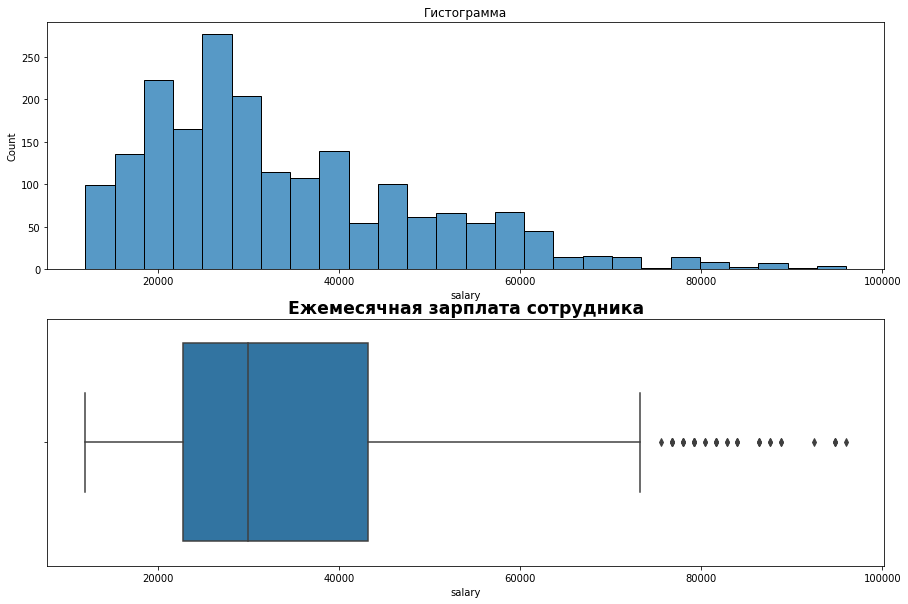

In [38]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize = (15,10))
    
sns.histplot(data = test_features, x = 'salary', ax=axs[0])
axs[0].set_title('Гистограмма')
    
sns.boxplot(data = test_features, x = 'salary', ax=axs[1])
axs[1].set_title('Диаграмма размаха')
       
plt.title('Ежемесячная зарплата сотрудника', fontsize = 'xx-large', fontweight = 600)
plt.show()

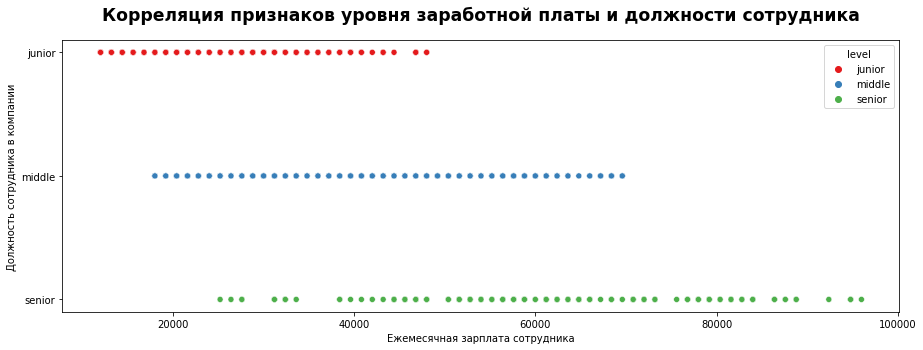

In [39]:
fig = plt.subplots(figsize = (15,5))

sns.scatterplot(data=test_features, x='salary', y = 'level', hue = 'level', palette = 'Set1')

plt.title('Корреляция признаков уровня заработной платы и должности сотрудника', 
          fontsize = 'xx-large', 
          fontweight = 600,
          y = 1.05)
plt.xlabel('Ежемесячная зарплата сотрудника')
plt.ylabel('Должность сотрудника в компании')
plt.show()

**ВЫВОД:**

- Уровень ежемесячной зарплаты сотрудников находится в диапазоне от 22800 до 43200. Медианное значение - 30000. Выбросы на диаграмме размаха - зарплаты сотрудников уровня senior.

In [40]:
test_features.set_index('id', inplace=True)

In [41]:
interval_cols = ['salary']

In [42]:
phik_overview = phik_matrix(test_features, interval_cols=interval_cols)

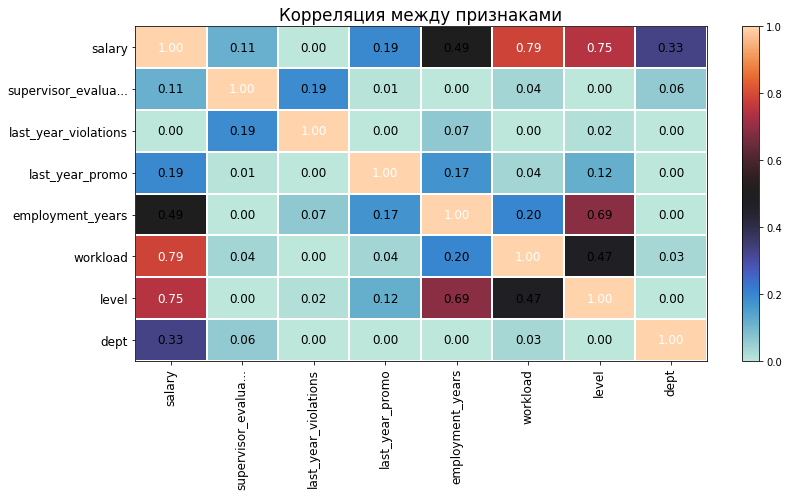

In [43]:
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='icefire',
    title=r'Корреляция между признаками',
    fontsize_factor=1.2,
    figsize=(12, 7)
) 

**ВЫВОД:**

- Высокие коэффициенты корреляции между признаками уровня загруженности сотрудника и ежемесячной заработной платы (0.79);
- Коэффициент корреляции  между признаками уровня занимаемой должности и ежемесячной заработной платы(0.75);
- Мультиколлинеарность между входными признаками не наблюдается, т.к. значения коэффициента корреляции от 0.9 до 0.95 по модулю отсутствуют.


- Исследовательский анализ тренировочной и тестовой выборок показал, что существенных различий в данных в части распределения признаков нет. Оценка будущей модели на этих данных будет корректной. 

### Задача 1: Подготовка данных


In [44]:
train_job_sf.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
155278,sales,junior,medium,2,no,no,1,24000,0.58
653870,hr,junior,high,2,no,no,5,38400,0.76
184592,sales,junior,low,1,no,no,2,12000,0.11
171431,technology,junior,low,4,no,no,2,18000,0.37
693419,hr,junior,medium,1,no,no,3,22800,0.20


In [45]:
test_features.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800
686555,hr,junior,medium,1,no,no,4,30000
467458,sales,middle,low,5,no,no,4,19200
418655,sales,middle,low,6,no,no,4,19200
789145,hr,middle,medium,5,no,no,5,40800


In [46]:
test_target_job_sf_rate.head()

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


Объединим входные и целевые признаки тестовой выборки по id

In [47]:
merge_test_features_target = test_features.merge(test_target_job_sf_rate, on='id', how='left')
merge_test_features_target.set_index('id', inplace=True)

In [48]:
merge_test_features_target.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.79
686555,hr,junior,medium,1,no,no,4,30000,0.72
467458,sales,middle,low,5,no,no,4,19200,0.64
418655,sales,middle,low,6,no,no,4,19200,0.60
789145,hr,middle,medium,5,no,no,5,40800,0.75


In [49]:
X_train = train_job_sf.drop('job_satisfaction_rate', axis=1)
y_train = train_job_sf['job_satisfaction_rate'] 
X_test = merge_test_features_target.drop('job_satisfaction_rate', axis=1)
y_test = merge_test_features_target['job_satisfaction_rate']

In [50]:
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(4000, 8)
(2000, 8)
(4000,)
(2000,)


Количественные и категориальные признаки обработаем в пайплайне раздельно.

In [51]:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary']

Добавляем OneHotEncoder-кодирование в пайплайн. В данных есть пропуски, заполним их самым часто встречающимся значением с помощью SimpleImputer.

In [52]:
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
        )
    ]
) 

Добавляем Ordinal-кодирование в пайплайн. Заполним пропуски самым часто встречающимся значением с помощью SimpleImputer.

In [53]:
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',  
            OrdinalEncoder(
                categories=[['junior', 'middle', 'senior'],['low', 'medium', 'high']], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
) 

Объединим кодирование и масштабирование в один пайплайн с подготовкой данных. А так же укажем, к каким данным какие операции применять.

- Применяем пайплайн ohe_pipe к данным ohe_columns, которые требуют OHE-кодирования. Это шаг ohe.
- Применяем пайплайн ord_pipe к данным ord_columns, которые требуют Ordinal-кодирования. Это шаг ord.
- Масштабируем данные num_columns. Это шаг num.

Применим инструмент ColumnTransformer — он объединит операции по подготовке данных. В нашей задаче это кодирование и масштабирование.

In [54]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
) 

### Задача 1: Обучение моделей


Создадим итоговый пайплайн для обучения четырех моделей.

In [55]:
pipe_final= Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

Создадим словари с моделями  LinearRegression(), DecisionTreeClassifier() их гиперпараметрами и методами масштабирования.

In [56]:
param_distributions = [

    {
        'models': [LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

Выберем лучшую модель и проверим её качество на основе новой метрики — SMAPE (англ. symmetric mean absolute percentage error, «симметричное среднее абсолютное процентное отклонение»). 

Напишем функцию, которая принимает на вход массивы NumPy или объекты Series в pandas и возвращает значение метрики SMAPE. 
Критерий успеха: SMAPE ≤ 15 на тестовой выборке.

In [57]:
def SMAPE_func(y_true, y_pred):
    numerator = np.abs(y_true - y_pred)
    denumerator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    return np.mean(numerator / denumerator) * 100

SMAPE = make_scorer(score_func=SMAPE_func, greater_is_better=False)

In [58]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_distributions, 
    cv=5,
    scoring= SMAPE,
    random_state=RANDOM_STATE,
    n_jobs=-1
)

In [59]:
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'last_year_violations']),
                                                                              ('ord',
                                                                               Pip...
                   param_distributions=[{'models': [LinearRegression()],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [DecisionTreeRegressor(random_state=42)],
                                         'models__max_depth': range(2, 15),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42,
                   scoring=make_scorer(SMAPE_func, greater_is_better=False, response_method='predict'))

In [60]:
print('Метрика SMAPE для лучшей модели:\n', randomized_search.best_score_)
print('\nЛучшая модель и её параметры:\n\n', randomized_search.best_estimator_) 

Метрика SMAPE для лучшей модели:
 -15.146839853857449

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                              

In [61]:
best_model = randomized_search.best_estimator_
randomized_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_befor...
                                                                   OrdinalEncoder(categories=[['junior',
                                                                                               'middle',
                                                                                               'senior'],
                                                                                              ['low',
                                                                                               'medium',
                                                                                               'high']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['level', 'workload']),
                                                 ('num', StandardScaler(),
                                                  ['employment_years',
                                                   'supervisor_evaluation',
                                                   'salary'])])),
                ('models',
                 DecisionTreeRegressor(max_depth=14, random_state=42))])

Рассчитаем прогноз на тестовых данных:

In [62]:
y_pred = best_model.predict(X_test)

In [63]:
print(f'Метрика SMAPE на тестовой выборке: {round(SMAPE_func(y_test, y_pred),2)}')

Метрика SMAPE на тестовой выборке: 14.2


**ВЫВОД:**

- Лучшая модель - DecisionTreeRegressor;
- Метрика SMAPE 14.48. Критерий успеха: SMAPE ≤ 15 на тестовой выборке. Модель можно считать лучшей.

### Задача 1: Выводы


ВЫВОД ПО ПРЕДОБРАБОТКЕ ДАННЫХ:

- Явных и неявных дубликатов не обнаружено;
- Пустые значения заменили на nan. Далее обработаем пропуски в пайплайне;
- Опечатка исправлена.

ВЫВОД ПО ИССЛЕДОВАТЕЛЬСКОМУ АНАЛИЗУ ДАННЫХ:
- 38% сотрудников работают в отделе продаж, 22% в технологическом отделе, в отделах закупок и маркетинга работает примерно одинаковое количество сотрудников (15% и 14% соответственно), в HR-отделе работают 11% сотрудников;
- По уровню занимаемой должности сотрудникипочти в равных долях представляют категории junior и middle (47% и 44% соответственно). Senior - 9%;
- 30% сотрудников загружены мало, 52% - средне, 18% оценили свою загруженность как высокую;
- Большинство сотрудников работают 1-2 года (24% и 20% соответственно), 3-4 года - 12% и 10% соответственно, далее количество сотрудников уменьшается до 2% (10 лет);
- Повышение за последний год было у 3% сотрудников;
- Трудовой договор за последний год нарушили 14% сотрудников;
- Руководитель оценил качества работы 40% сотрудников на 4 балла, 32% - 3 балла, 5 баллов получили 14% сотрудников, 1-2 балла получили 5% и 10% соответственно.


- Уровень ежемесячной зарплаты сотрудников находится в диапазоне от 22800 до 43200. Медианное значение - 30000. Выбросы на диаграмме размаха - зарплаты сотрудников уровня senior.
- Уровень удовлетворенности не зависит от уровня занимаемой должности и уровня заработной платы. 


- Высокие коэффициенты корреляции между признаками уровня загруженности сотрудника и ежемесячной заработной платы (0.79);
- Коэффициент корреляции между признаками уровня занимаемой должности и ежемесячной заработной платы(0.72);
- Оценка качества работы сотрудника, которую дал руководитель коррелирует с уровнем удовлетворенности сотрудника работой в компании (0.76);
- Мультиколлинеарность между входными признаками не наблюдается, т.к. значения коэффициента корреляции от 0.9 до 0.95 по модулю отсутствуют.


- Исследовательский анализ тренировочной и тестовой выборок показал, что существенных различий в данных в части распределения признаков нет. Оценка будущей модели на этих данных будет корректной.

ВЫВОД ПО ОБУЧЕНИЮ МОДЕЛИ:

- Лучшая модель - DecisionTreeRegressor;
- Метрика SMAPE 14.48. Критерий успеха: SMAPE ≤ 15 на тестовой выборке. Модель можно считать лучшей.

## Задача 2: Предсказание увольнения сотрудника из компании

### Задача 2: Загрузка данных

#### Общая информация о данных

In [64]:
train_quit = pd.read_csv('/datasets/train_quit.csv', sep=',')
test_target_quit = pd.read_csv('/datasets/test_target_quit.csv', sep=',')

Входные признаки тестовой выборки те же, что и в задаче 1: test_features

Тренировочная выборка:

In [65]:
general_info_data(train_quit)

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


None

Целевой признак тестовой выборки:

In [66]:
general_info_data(test_target_quit)

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


None

**ВЫВОД:**

Тренировочная выборка: 
- содержит 4000 строк;
- пропусков нет;
- типы данных в столбцах указаны корректно.

Входные признаки тестовой выборки те же, что и в задаче 1: `test_features`

Целевой признак тестовой выборки:
- содержит 2000 строк;
- пропусков нет;
- типы данных в столбцах указаны корректно.

### Задача 2: Предобработка данных

#### Проверка на дубликаты

##### Проверка на явные дубликаты

In [67]:
train_quit.duplicated().sum()

0

In [68]:
test_features.duplicated().sum()

557

In [69]:
test_target_quit.duplicated().sum()

0

**ВЫВОД:**

Явных дубликатов не обнаружено

##### Проверка на неявные дубликаты

In [70]:
df_columns = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']

for i in df_columns:
    print(train_quit[i].value_counts(),'\n')

sales         1438
technology     928
purchasing     588
marketing      582
hr             464
Name: dept, dtype: int64 

junior    1949
middle    1694
sinior     357
Name: level, dtype: int64 

medium    2118
low       1208
high       674
Name: workload, dtype: int64 

no     3887
yes     113
Name: last_year_promo, dtype: int64 

no     3455
yes     545
Name: last_year_violations, dtype: int64 



In [71]:
test_target_quit['quit'].value_counts()

no     1436
yes     564
Name: quit, dtype: int64

**ВЫВОД:**

Неявных дубликатов не обнаружено

#### Поиск пропущенных значений

Тренировочная выборка:

In [72]:
train_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


In [73]:
train_quit.isna().sum()

id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64

In [74]:
df_col_train = ['id',
                'dept', 
                'level', 
                'workload', 
                'employment_years', 
                'last_year_promo', 
                'last_year_violations',
                'supervisor_evaluation', 
                'salary', 
                'quit']

In [75]:
for i in df_col_train:
    print(f'{i}:', train_quit[i].unique())

id: [723290 814010 155091 ... 536432 692133 853842]
dept: ['sales' 'purchasing' 'marketing' 'technology' 'hr']
level: ['middle' 'junior' 'sinior']
workload: ['high' 'medium' 'low']
employment_years: [ 2  5  1  8  4  7  3  9  6 10]
last_year_promo: ['no' 'yes']
last_year_violations: ['no' 'yes']
supervisor_evaluation: [4 1 3 5 2]
salary: [54000 27600 37200 24000 25200 18000 44400 19200 45600 57600 33600 16800
 22800 26400 82800 32400 39600 30000 46800 12000 15600 58800 60000 66000
 21600 38400 62400 40800 56400 34800 28800 52800 20400 36000 61200 48000
 43200 73200 31200 78000 64800 72000 94800 96000 63600 79200 55200 42000
 49200 50400 14400 13200 51600 67200 88800 68400 69600 70800 84000 81600
 87600 75600 91200 76800 74400 80400 85200 86400 92400]
quit: ['no' 'yes']


В столбце `level` опечатка. Исправим написание значений в столбцах:

In [76]:
train_quit['level'] = train_quit['level'].replace('sinior', 'senior')
train_quit['level'].value_counts()

junior    1949
middle    1694
senior     357
Name: level, dtype: int64

**ВЫВОД:**

Пропуски не обнаружены. Опечатка исправлена.

### Задача 2: Исследовательский анализ данных


In [77]:
train_quit.describe()

,id,employment_years,supervisor_evaluation,salary
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,552099.283750,3.701500,3.474750,33805.800000
std,260158.031387,2.541852,1.004049,15152.415163
min,100222.000000,1.000000,1.000000,12000.000000
25%,327785.750000,2.000000,3.000000,22800.000000
50%,546673.000000,3.000000,4.000000,30000.000000
75%,781497.750000,6.000000,4.000000,43200.000000
max,999915.000000,10.000000,5.000000,96000.000000


In [78]:
columns_cat = ['dept', 
               'level',
               'workload',
               'employment_years',
               'last_year_promo',
               'last_year_violations', 
               'supervisor_evaluation',
               'quit']

name_cat = ['Отдел, в котором работает сотрудник',
            'Уровень занимаемой должности', 
            'Уровень загруженности сотрудника',
            'Длительность работы в компании (в годах)',
            'Повышение за последний год', 
            'Нарушение трудового договора за последний год', 
            'Оценка качества работы сотрудника, которую дал руководитель', 
            'Увольнение']

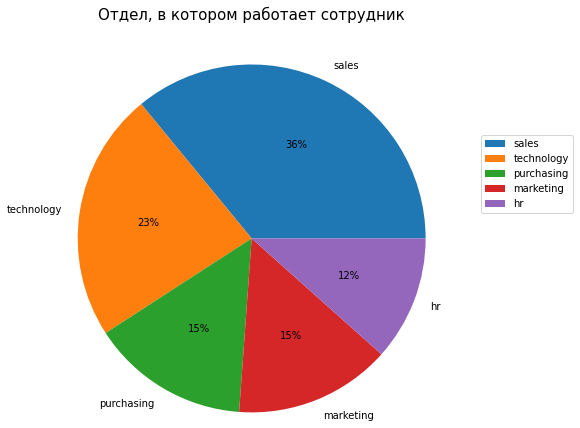

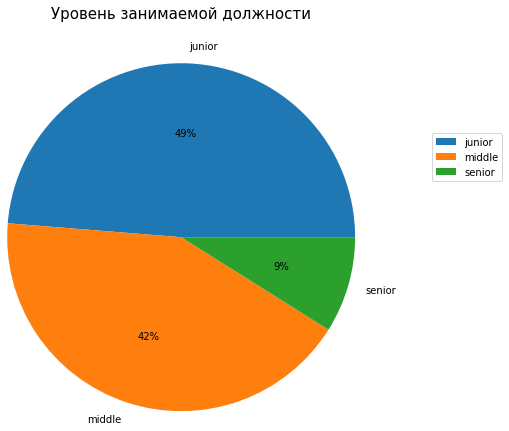

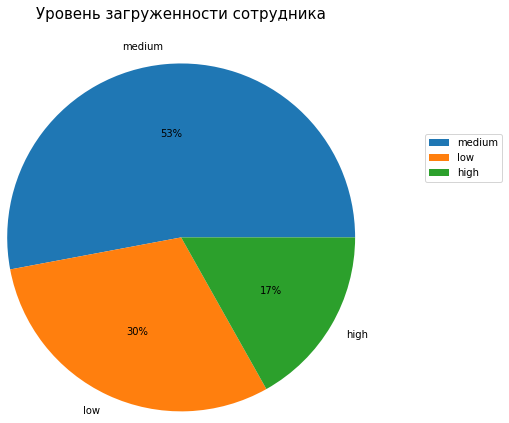

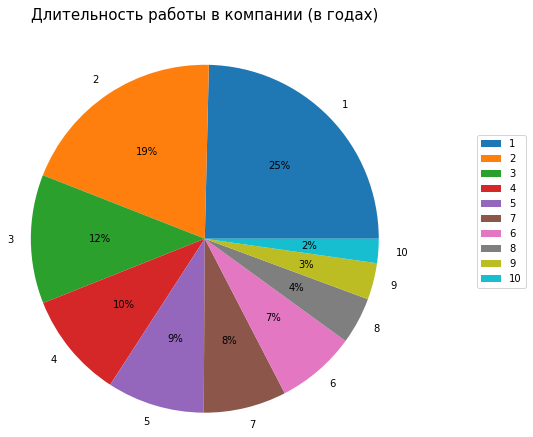

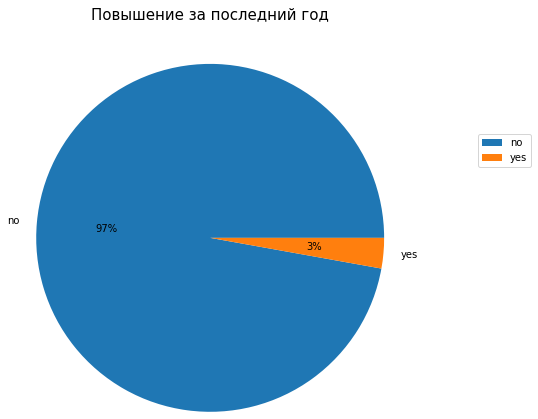

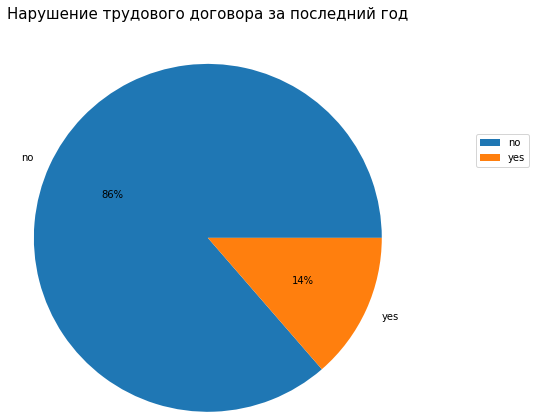

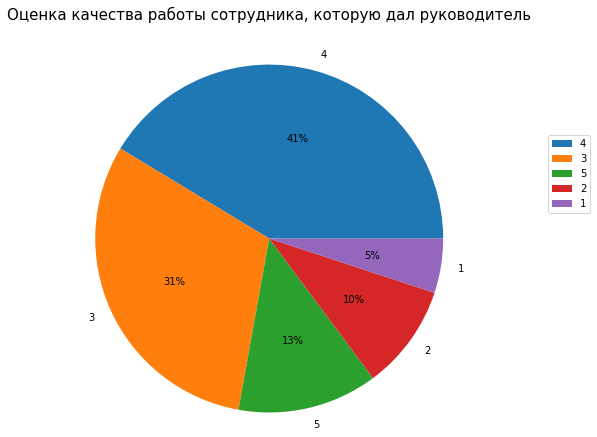

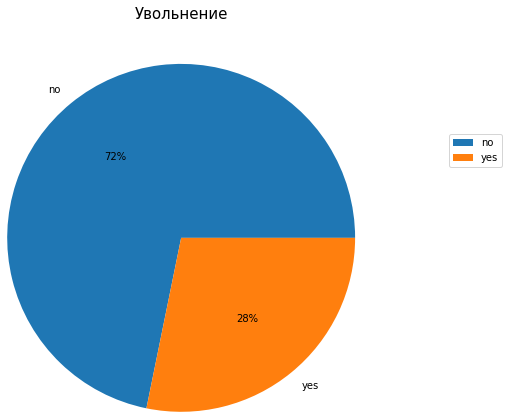

In [79]:
for i, j in zip(columns_cat, name_cat):
    train_quit[i].value_counts().plot(y = 'count', kind = 'pie', radius = 2, autopct='%1.0f%%')
    plt.title(j, fontsize=15, pad=110)
    plt.legend(bbox_to_anchor=(2,1))
    plt.ylabel(' ')
    plt.show()

**ВЫВОД:**

- 36% сотрудников работают в отделе продаж, 23% в технологическом отделе, в отделах закупок и маркетинга работает примерно одинаковое количество сотрудников (15% и 15% соответственно), в HR-отделе работают 12% сотрудников;
- По уровню занимаемой должности сотрудники почти в равных долях представляют категории junior и middle (49% и 42% соответственно). Senior - 9%;
- 30% сотрудников загружены мало, 53% - средне, 17% оценили свою загруженность как высокую;
- Большинство сотрудников работают 1-2 года (25% и 19% соответственно), 3-4 года - 12% и 10% соответственно, далее количество сотрудников уменьшается до 2% (10 лет);
- Повышение за последний год было у 3% сотрудников;
- Трудовой договор за последний год нарушили 14% сотрудников;
- Руководитель оценил качества работы 41% сотрудников на 4 балла, 31% - 3 балла, 5 баллов получили 13% сотрудников, 1-2 балла получили 5% и 10% соответственно;
- Уволившихся сотрудников 28%.

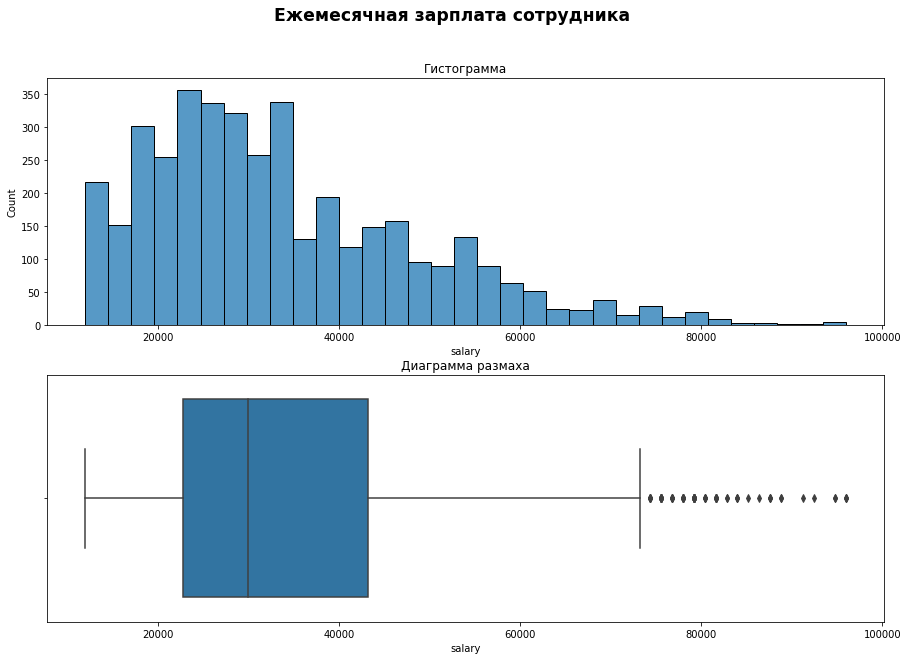

In [80]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize = (15,10))
    
sns.histplot(data = train_quit, x = 'salary', ax=axs[0])
axs[0].set_title('Гистограмма')
    
sns.boxplot(data = train_quit, x = 'salary', ax=axs[1])
axs[1].set_title('Диаграмма размаха')
       
fig.suptitle('Ежемесячная зарплата сотрудника', fontsize = 'xx-large', fontweight = 600)
plt.show()

In [81]:
train_quit.describe()

,id,employment_years,supervisor_evaluation,salary
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,552099.283750,3.701500,3.474750,33805.800000
std,260158.031387,2.541852,1.004049,15152.415163
min,100222.000000,1.000000,1.000000,12000.000000
25%,327785.750000,2.000000,3.000000,22800.000000
50%,546673.000000,3.000000,4.000000,30000.000000
75%,781497.750000,6.000000,4.000000,43200.000000
max,999915.000000,10.000000,5.000000,96000.000000


**ВЫВОД:**

- Уровень ежемесячной зарплаты сотрудников находится в диапазоне от 22800 до 43200. Медианное значение - 30000. Выбросы на диаграмме размаха - зарплаты сотрудников уровня senior.


In [82]:
train_quit.set_index('id', inplace=True)

In [83]:
interval_cols = ['salary']

In [84]:
phik_overview = phik_matrix(train_quit, interval_cols=interval_cols)

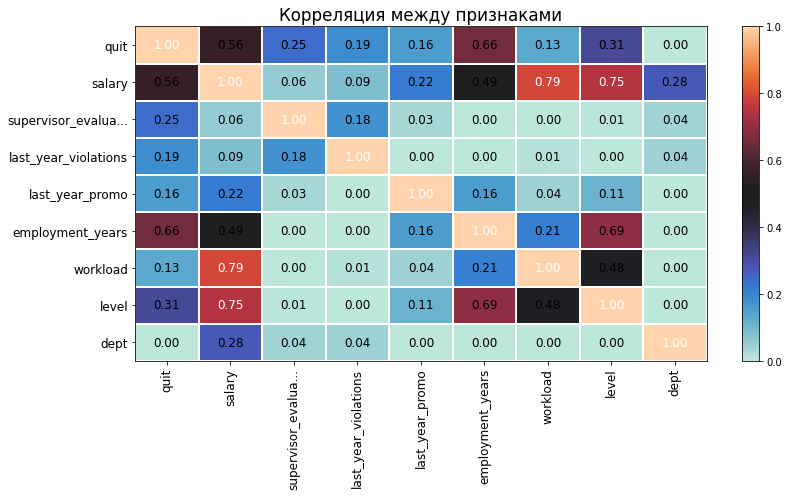

In [85]:
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='icefire',
    title=r'Корреляция между признаками',
    fontsize_factor=1.2,
    figsize=(12, 7)
) 

**ВЫВОД:**

- Высокие коэффициенты корреляции между признаками уровня загруженности сотрудника и ежемесячной заработной платы (0.79);
- Коэффициент корреляции  между признаками уровня занимаемой должности и ежемесячной заработной платы(0.75);
- Длительность работы в компании коррелирует с уровнем занимаемой должности и увольнением (0.69);
- Мультиколлинеарность между входными признаками не наблюдается, т.к. значения коэффициента корреляции от 0.9 до 0.95 по модулю отсутствуют. 

Составим портрет «уволившегося сотрудника»

In [86]:
quit_yes = train_quit.query('quit == "yes"')
quit_no = train_quit.query('quit == "no"')

In [87]:
print(f'Cреднее значение зарплаты ушедших сотрудников: {round(quit_yes["salary"].mean())}\nCреднее значение зарплаты оставшихся сотрудников: {round(quit_no["salary"].mean())}')

Cреднее значение зарплаты ушедших сотрудников: 23885
Cреднее значение зарплаты оставшихся сотрудников: 37702


**ВЫВОД:**

- Уровень зарплат уволившихся сотрудников ниже, чем у оставшихся в компании.

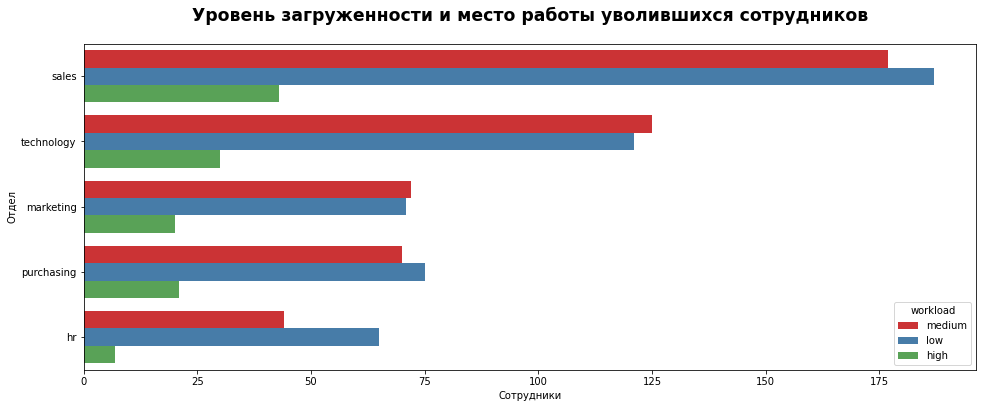

In [88]:
plt.figure(figsize = (16,6))
sns.countplot(
    data = quit_yes,
    y = 'dept',
    hue='workload',
    orient='h',
    palette='Set1',
)
plt.xlabel('Сотрудники')
plt.ylabel('Отдел')
plt.title('Уровень загруженности и место работы уволившихся сотрудников', fontsize = 'xx-large', fontweight = 800, y=1.05)
plt.show()

**ВЫВОД:**

- Чаще увольняются незагруженные сотрудники отдела продаж.

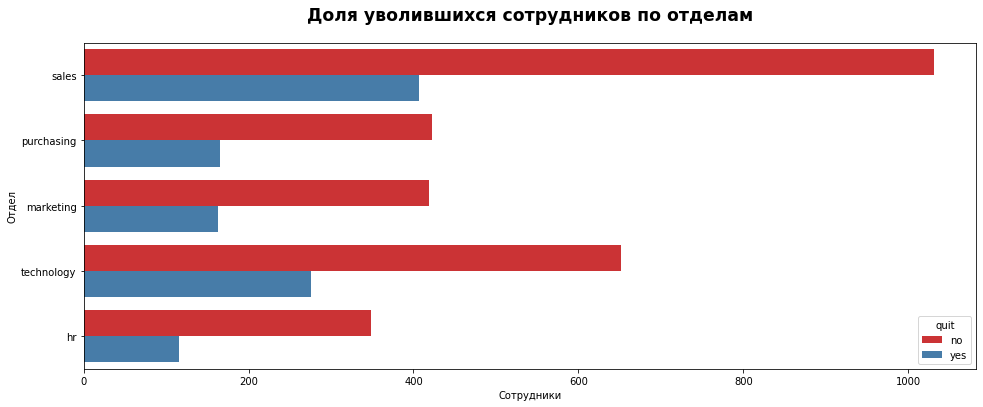

,dept,quit,proportion
1,hr,yes,0.250000
3,marketing,yes,0.280069
5,purchasing,yes,0.282313
7,sales,yes,0.283032
9,technology,yes,0.297414


In [89]:
plt.figure(figsize = (16,6))
ax = sns.countplot(
    data = train_quit ,
    y = 'dept',
    hue='quit',
    orient='h',
    palette='Set1',
)

plt.xlabel('Сотрудники')
plt.ylabel('Отдел')
plt.title('Доля уволившихся сотрудников по отделам', fontsize = 'xx-large', fontweight = 800, y=1.05)
plt.show()

group_dept = train_quit.groupby(['dept'])['quit'].value_counts(normalize=True).rename('proportion').reset_index()
group_dept.query('quit == "yes"')

**ВЫВОД:**

- Доля уволившихся, среди сотрудников технологического отдела  - 0.29, среди сотрудников отделов продаж, закупок и маркетинга - 0.28, среди сотрудников отдела hr - 0.25

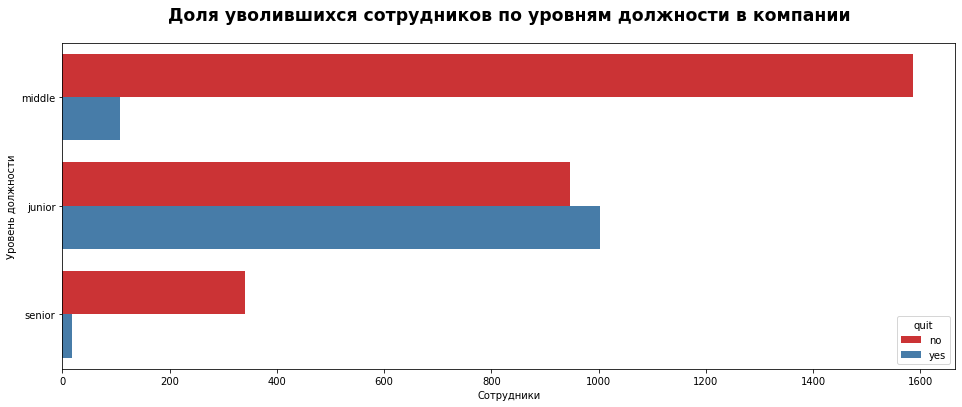

,level,quit,proportion
0,junior,yes,0.514623
3,middle,yes,0.063754
5,senior,yes,0.047619


In [90]:
plt.figure(figsize = (16,6))
ax = sns.countplot(
    data = train_quit ,
    y = 'level',
    hue='quit',
    orient='h',
    palette='Set1',
)

plt.xlabel('Сотрудники')
plt.ylabel('Уровень должности')
plt.title('Доля уволившихся сотрудников по уровням должности в компании', fontsize = 'xx-large', fontweight = 800, y=1.05)
plt.show()

group_level = train_quit.groupby(['level'])['quit'].value_counts(normalize=True).rename('proportion').reset_index()
group_level.query('quit == "yes"')

**ВЫВОД:**

- Наибольшая доля уволившихся, среди сотрудников уровня junior  - 0.51, доля среди сотрудников middle - 0.06, senior - 0.04

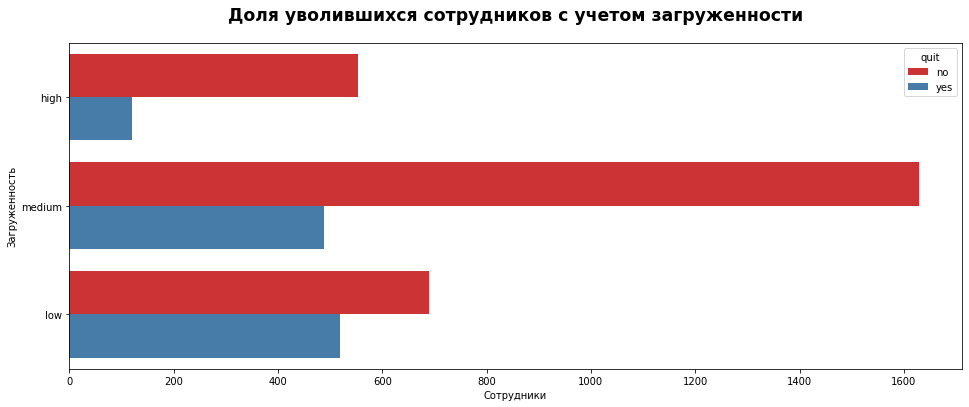

,workload,quit,proportion
1,high,yes,0.179525
3,low,yes,0.429636
5,medium,yes,0.230406


In [91]:
plt.figure(figsize = (16,6))
ax = sns.countplot(
    data = train_quit ,
    y = 'workload',
    hue='quit',
    orient='h',
    palette='Set1',
)

plt.xlabel('Сотрудники')
plt.ylabel('Загруженность')
plt.title('Доля уволившихся сотрудников с учетом загруженности', fontsize = 'xx-large', fontweight = 800, y=1.05)
plt.show()

group_workload = train_quit.groupby(['workload'])['quit'].value_counts(normalize=True).rename('proportion').reset_index()
group_workload.query('quit == "yes"')

**ВЫВОД:**

- Наибольшая доля уволившихся, среди сотрудников с низкой загруженностью  - 0.43, наименьшая доля среди сотрудников с высокой загруженностью - 0.17

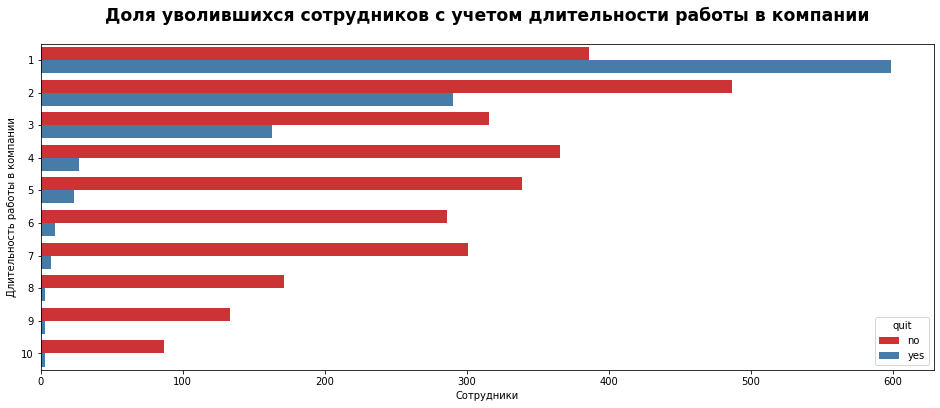

,employment_years,quit,proportion
0,1,yes,0.608122
3,2,yes,0.373230
5,3,yes,0.340292
7,4,yes,0.068702
9,5,yes,0.063536
11,6,yes,0.033784
13,7,yes,0.022727
15,8,yes,0.017241
17,9,yes,0.022059
19,10,yes,0.033333


In [92]:
plt.figure(figsize = (16,6))
ax = sns.countplot(
    data = train_quit ,
    y = 'employment_years',
    hue='quit',
    orient='h',
    palette='Set1',
)

plt.xlabel('Сотрудники')
plt.ylabel('Длительность работы в компании')
plt.title('Доля уволившихся сотрудников с учетом длительности работы в компании', fontsize = 'xx-large', fontweight = 800, y=1.05)
plt.show()

group_employment_years = train_quit.groupby(['employment_years'])['quit'].value_counts(normalize=True).rename('proportion').reset_index()
group_employment_years.query('quit == "yes"')

**ВЫВОД:**

- Наибольшая доля уволившихся, среди сотрудников, работающих в компании первый год  - 0.60, 2-3 года - 0.37-0.34 соответственно. Далее доля уволившихся составляет 0.01 - 0.06.

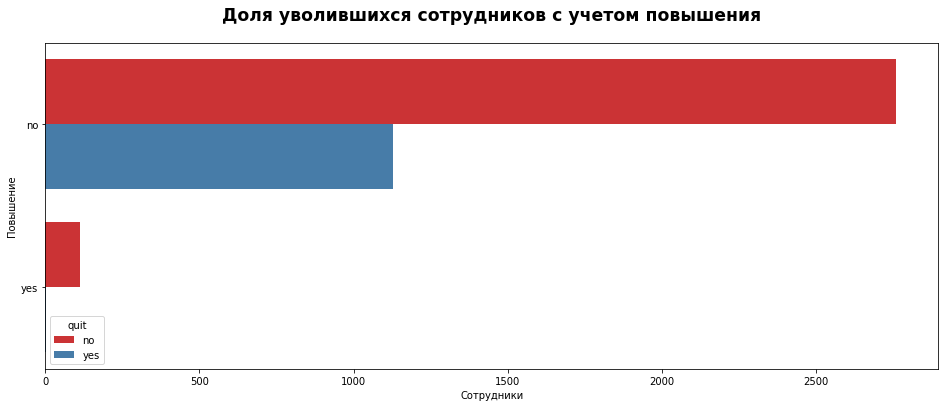

,last_year_promo,quit,proportion
1,no,yes,0.289941
3,yes,yes,0.008850


In [93]:
plt.figure(figsize = (16,6))
ax = sns.countplot(
    data = train_quit ,
    y = 'last_year_promo',
    hue='quit',
    orient='h',
    palette='Set1',
)

plt.xlabel('Сотрудники')
plt.ylabel('Повышение')
plt.title('Доля уволившихся сотрудников с учетом повышения', fontsize = 'xx-large', fontweight = 800, y=1.05)
plt.show()

group_last_year_promo = train_quit.groupby(['last_year_promo'])['quit'].value_counts(normalize=True).rename('proportion').reset_index()
group_last_year_promo.query('quit == "yes"')

**ВЫВОД:**

- Доля уволившихся, среди сотрудников не получивших повышение - 0.28, среди остальных - 0.01.

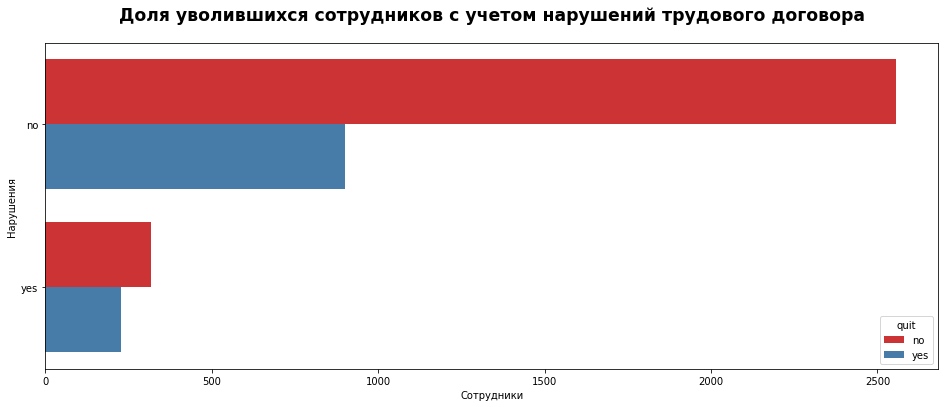

,last_year_violations,quit,proportion
1,no,yes,0.260492
3,yes,yes,0.418349


In [94]:
plt.figure(figsize = (16,6))
ax = sns.countplot(
    data = train_quit ,
    y = 'last_year_violations',
    hue='quit',
    orient='h',
    palette='Set1',
)

plt.xlabel('Сотрудники')
plt.ylabel('Нарушения')
plt.title('Доля уволившихся сотрудников с учетом нарушений трудового договора', fontsize = 'xx-large', fontweight = 800, y=1.05)
plt.show()

group_last_year_violations = train_quit.groupby(['last_year_violations'])['quit'].value_counts(normalize=True).rename('proportion').reset_index()
group_last_year_violations.query('quit == "yes"')

**ВЫВОД:**

- Доля уволившихся, среди сотрудников нарушавших трудовой договор - 0.42, среди остальных - 0.26.

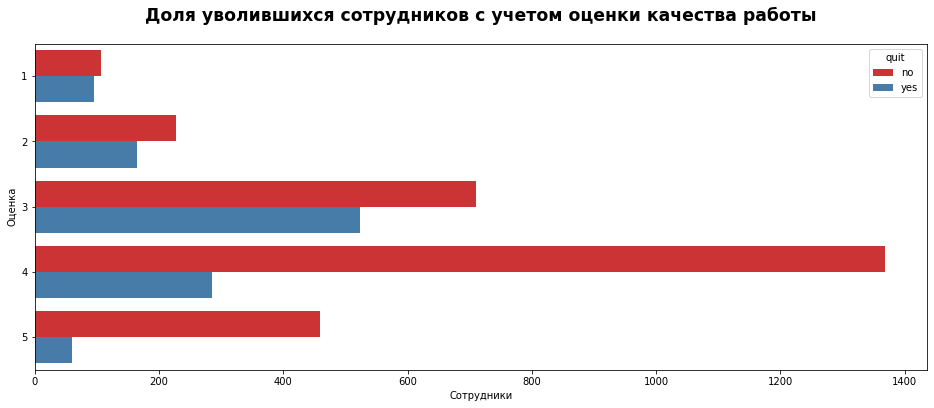

,supervisor_evaluation,quit,proportion
1,1,yes,0.470297
3,2,yes,0.419437
5,3,yes,0.424169
7,4,yes,0.172914
9,5,yes,0.115385


In [95]:
plt.figure(figsize = (16,6))
ax = sns.countplot(
    data = train_quit ,
    y = 'supervisor_evaluation',
    hue='quit',
    orient='h',
    palette='Set1',
)

plt.xlabel('Сотрудники')
plt.ylabel('Оценка')
plt.title('Доля уволившихся сотрудников с учетом оценки качества работы', fontsize = 'xx-large', fontweight = 800, y=1.05)
plt.show()

group_supervisor_evaluation = train_quit.groupby(['supervisor_evaluation'])['quit'].value_counts(normalize=True).rename('proportion').reset_index()
group_supervisor_evaluation.query('quit == "yes"')

**ВЫВОД:**

- Наибольшая доля уволившихся, среди сотрудников с оценкой 1 - 0.47, наименьшая среди сотрудников с оценкой 5 - 0.11.

In [96]:
job_sf_quit = test_target_job_sf_rate.merge(test_target_quit, how ='inner', on ='id')

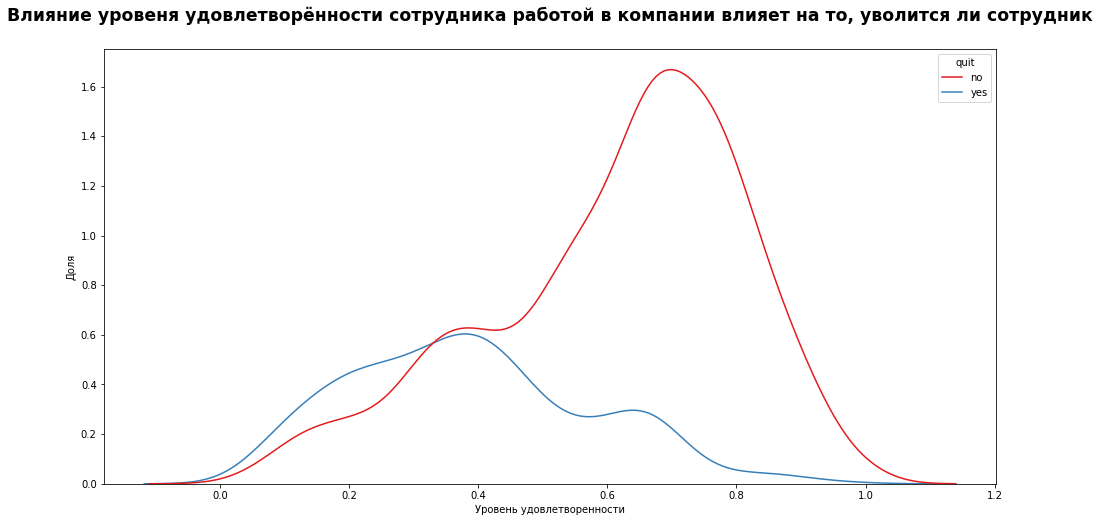

In [97]:
plt.figure(figsize = (16,8))
sns.kdeplot(
    data = job_sf_quit,
    x = 'job_satisfaction_rate',
    hue='quit',
    palette='Set1',
)
plt.xlabel('Уровень удовлетворенности')
plt.ylabel('Доля')
plt.title('Влияние уровеня удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник',
          fontsize = 'xx-large', 
          fontweight = 800, 
          y=1.05)
plt.show()

**ВЫВОД:**

- Сотрудники с низким уровнем удовлетворенности увольняются из компании

### Задача 2: Добавление нового входного признака


Добавим `job_satisfaction_rate`, предсказанный лучшей моделью первой задачи, к входным признакам второй задачи.

In [98]:
train_quit['job_satisfaction_rate'] = best_model.predict(train_quit)
train_quit.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
id,,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no,0.648000
814010,sales,junior,medium,2,no,no,4,27600,no,0.821905
155091,purchasing,middle,medium,5,no,no,1,37200,no,0.340000
257132,sales,junior,medium,2,no,yes,3,24000,yes,0.380000
910140,marketing,junior,medium,2,no,no,5,25200,no,0.690000


In [99]:
test_features['job_satisfaction_rate'] = best_model.predict(test_features)
test_features.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.867500
686555,hr,junior,medium,1,no,no,4,30000,0.676667
467458,sales,middle,low,5,no,no,4,19200,0.657143
418655,sales,middle,low,6,no,no,4,19200,0.655000
789145,hr,middle,medium,5,no,no,5,40800,0.815000


### Задача 2: Подготовка данных


Количественные и категориальные признаки обработаем в пайплайне раздельно.

In [100]:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']

In [101]:
merge_quit_test = test_features.merge(test_target_quit, on='id', how='left')
merge_quit_test.set_index('id', inplace=True)

In [102]:
merge_quit_test.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
id,,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.867500,no
686555,hr,junior,medium,1,no,no,4,30000,0.676667,no
467458,sales,middle,low,5,no,no,4,19200,0.657143,no
418655,sales,middle,low,6,no,no,4,19200,0.655000,no
789145,hr,middle,medium,5,no,no,5,40800,0.815000,no


In [103]:
X_train = train_quit.drop('quit', axis=1)
y_train = train_quit['quit'] 
X_test = merge_quit_test.drop('quit', axis=1)
y_test = merge_quit_test['quit']

In [104]:
for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(4000, 9)
(2000, 9)
(4000,)
(2000,)


Переведём строковые значения целевого признака в порядковые числа

In [105]:
label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

Количественные и категориальные признаки обработаем в пайплайне раздельно.

In [106]:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary']

Добавляем OneHotEncoder-кодирование в пайплайн. В данных есть пропуски, заполним их самым часто встречающимся значением с помощью SimpleImputer.

In [107]:
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
        )
    ]
) 

Добавляем Ordinal-кодирование в пайплайн. Заполним пропуски самым часто встречающимся значением с помощью SimpleImputer.

In [108]:
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',  
            OrdinalEncoder(
                categories=[['junior', 'middle', 'senior'],['low', 'medium', 'high']], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
) 

Объединим кодирование и масштабирование в один пайплайн с подготовкой данных. А так же укажем, к каким данным какие операции применять.

- Применяем пайплайн ohe_pipe к данным ohe_columns, которые требуют OHE-кодирования. Это шаг ohe.
- Применяем пайплайн ord_pipe к данным ord_columns, которые требуют Ordinal-кодирования. Это шаг ord.
- Масштабируем данные num_columns. Это шаг num.

Применим инструмент ColumnTransformer — он объединит операции по подготовке данных. В нашей задаче это кодирование и масштабирование.

In [109]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough',
    force_int_remainder_cols=False
) 

### Задача 2: Обучение моделей


Создадим итоговый пайплайн для обучения четырех моделей.

In [110]:
pipe_final= Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

Создадим словари с моделями  KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression(), SVC(), их гиперпараметрами и методами масштабирования.

In [111]:
param_distributions = [
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },
    
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(1, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
   
    {
        'models': [SVC(kernel='linear',random_state=RANDOM_STATE, probability= True)],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  

    },
    
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
] 

In [112]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_distributions, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

Используем метрику roc_auc, так как с её помощью можно оценить качество работы модели учитывая все возможные пороговые значения, кроме того эта метрика устойчива к несбалансированным классам.

In [113]:
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(force_int_remainder_cols=False,
                                                                remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['dept',
                                                                                'last_year_promo',
                                                                                'las...
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(kernel='linear',
                                                        probability=True,
                                                        random_state=42)],
                                         'models__C': range(1, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [LogisticRegression(random_state=42)],
                                         'models__C': range(1, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [114]:
print('Метрика roc_auc для лучшей модели:\n', randomized_search.best_score_)
print('\nЛучшая модель и её параметры:\n\n', randomized_search.best_estimator_) 

Метрика roc_auc для лучшей модели:
 0.9278368217085788

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                       

In [115]:
best_model_2 = randomized_search.best_estimator_
randomized_search.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                                                  Pipeli...
                                                                   OrdinalEncoder(categories=[['junior',
                                                                                               'middle',
                                                                                               'senior'],
                                                                                              ['low',
                                                                                               'medium',
                                                                                               'high']],
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['level', 'workload']),
                                                 ('num', MinMaxScaler(),
                                                  ['employment_years',
                                                   'supervisor_evaluation',
                                                   'salary'])])),
                ('models',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

In [116]:
y_pred = best_model_2.predict(X_test)
y_pred_proba = best_model_2.predict_proba(X_test)

In [117]:
roc_auc_score(y_test, y_pred_proba[:, 1]).round(2)

0.93

**ВЫВОД:**

- Лучшая модель DecisionTreeClassifier
- Метрика ROC-AUC 0.93. Критерий успеха: ROC-AUC ≥ 0.91 на тестовой выборке. Модель можно считать лучшей.

### Задача 2: Выводы


ВЫВОД ПО ПРЕДОБРАБОТКЕ ДАННЫХ:

- Явных и неявных дубликатов не обнаружено;
- Пропуски не обнаружены;
- Опечатка исправлена.


ВЫВОД ПО ИССЛЕДОВАТЕЛЬСКОМУ АНАЛИЗУ ДАННЫХ:
- 36% сотрудников работают в отделе продаж, 23% в технологическом отделе, в отделах закупок и маркетинга работает примерно одинаковое количество сотрудников (15% и 15% соответственно), в HR-отделе работают 12% сотрудников;
- По уровню занимаемой должности сотрудники почти в равных долях представляют категории junior и middle (49% и 42% соответственно). Senior - 9%;
- 30% сотрудников загружены мало, 53% - средне, 17% оценили свою загруженность как высокую;
- Большинство сотрудников работают 1-2 года (25% и 19% соответственно), 3-4 года - 12% и 10% соответственно, далее количество сотрудников уменьшается до 2% (10 лет);
- Повышение за последний год было у 3% сотрудников;
- Трудовой договор за последний год нарушили 14% сотрудников;
- Руководитель оценил качества работы 41% сотрудников на 4 балла, 31% - 3 балла, 5 баллов получили 13% сотрудников, 1-2 балла получили 5% и 10% соответственно;
- Уволившихся сотрудников 28%.

- Высокие коэффициенты корреляции между признаками уровня загруженности сотрудника и ежемесячной заработной платы (0.79);
- Коэффициент корреляции  между признаками уровня занимаемой должности и ежемесячной заработной платы(0.75);
- Длительность работы в компании коррелирует с уровнем занимаемой должности и увольнением (0.69);
- Мультиколлинеарность между входными признаками не наблюдается, т.к. значения коэффициента корреляции от 0.9 до 0.95 по модулю отсутствуют.

- Уровень ежемесячной зарплаты сотрудников находится в диапазоне от 22800 до 43200. Медианное значение - 30000. Выбросы на диаграмме размаха - зарплаты сотрудников уровня senior.

- Уровень зарплат уволившихся сотрудников ниже, чем у оставшихся в компании
      Cреднее значение зарплаты ушедших сотрудников: 23885
      Cреднее значение зарплаты оставшихся сотрудников: 37702
      
- Чаще увольняются незагруженные сотрудники отдела продаж.
- Сотрудники с низким уровнем удовлетворенности увольняются из компании

ВЫВОД ПО ОБУЧЕНИЮ МОДЕЛИ:
- Лучшая модель DecisionTreeClassifier
- Метрика ROC-AUC 0.93. Критерий успеха: ROC-AUC ≥ 0.91 на тестовой выборке. Модель можно считать лучшей.


## Общий вывод:

**ЗАДАЧА 1:** Построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных заказчика;

**ЗАДАЧА 2:** Построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.






**ЭТАПЫ РАБОТЫ:**

***Задача 1:*** 


ВЫВОД ПО ПРЕДОБРАБОТКЕ ДАННЫХ:

- Явных и неявных дубликатов не обнаружено;
- Пустые значения заменили на nan. Далее обработаем пропуски в пайплайне;
- Опечатка исправлена.

ВЫВОД ПО ИССЛЕДОВАТЕЛЬСКОМУ АНАЛИЗУ ДАННЫХ:
- 38% сотрудников работают в отделе продаж, 22% в технологическом отделе, в отделах закупок и маркетинга работает примерно одинаковое количество сотрудников (15% и 14% соответственно), в HR-отделе работают 11% сотрудников;
- По уровню занимаемой должности сотрудникипочти в равных долях представляют категории junior и middle (47% и 44% соответственно). Senior - 9%;
- 30% сотрудников загружены мало, 52% - средне, 18% оценили свою загруженность как высокую;
- Большинство сотрудников работают 1-2 года (24% и 20% соответственно), 3-4 года - 12% и 10% соответственно, далее количество сотрудников уменьшается до 2% (10 лет);
- Повышение за последний год было у 3% сотрудников;
- Трудовой договор за последний год нарушили 14% сотрудников;
- Руководитель оценил качества работы 40% сотрудников на 4 балла, 32% - 3 балла, 5 баллов получили 14% сотрудников, 1-2 балла получили 5% и 10% соответственно.


- Уровень ежемесячной зарплаты сотрудников находится в диапазоне от 22800 до 43200. Медианное значение - 30000. Выбросы на диаграмме размаха - зарплаты сотрудников уровня senior.
- Уровень удовлетворенности не зависит от уровня занимаемой должности и уровня заработной платы. 


- Высокие коэффициенты корреляции между признаками уровня загруженности сотрудника и ежемесячной заработной платы (0.79);
- Коэффициент корреляции между признаками уровня занимаемой должности и ежемесячной заработной платы(0.72);
- Оценка качества работы сотрудника, которую дал руководитель коррелирует с уровнем удовлетворенности сотрудника работой в компании (0.76);
- Мультиколлинеарность между входными признаками не наблюдается, т.к. значения коэффициента корреляции от 0.9 до 0.95 по модулю отсутствуют.

ВЫВОД ПО ОБУЧЕНИЮ МОДЕЛИ:

- Лучшая модель - DecisionTreeRegressor;
- Метрика SMAPE 14.48. Критерий успеха: SMAPE ≤ 15 на тестовой выборке. Модель можно считать лучшей.




***Задача 2:*** 

ВЫВОД ПО ПРЕДОБРАБОТКЕ ДАННЫХ:

- Явных и неявных дубликатов не обнаружено;
- Пропуски не обнаружены;
- Опечатка исправлена.


ВЫВОД ПО ИССЛЕДОВАТЕЛЬСКОМУ АНАЛИЗУ ДАННЫХ:
- 36% сотрудников работают в отделе продаж, 23% в технологическом отделе, в отделах закупок и маркетинга работает примерно одинаковое количество сотрудников (15% и 15% соответственно), в HR-отделе работают 12% сотрудников;
- По уровню занимаемой должности сотрудники почти в равных долях представляют категории junior и middle (49% и 42% соответственно). Senior - 9%;
- 30% сотрудников загружены мало, 53% - средне, 17% оценили свою загруженность как высокую;
- Большинство сотрудников работают 1-2 года (25% и 19% соответственно), 3-4 года - 12% и 10% соответственно, далее количество сотрудников уменьшается до 2% (10 лет);
- Повышение за последний год было у 3% сотрудников;
- Трудовой договор за последний год нарушили 14% сотрудников;
- Руководитель оценил качества работы 41% сотрудников на 4 балла, 31% - 3 балла, 5 баллов получили 13% сотрудников, 1-2 балла получили 5% и 10% соответственно;
- Уволившихся сотрудников 28%.

- Высокие коэффициенты корреляции между признаками уровня загруженности сотрудника и ежемесячной заработной платы (0.79);
- Коэффициент корреляции  между признаками уровня занимаемой должности и ежемесячной заработной платы(0.75);
- Длительность работы в компании коррелирует с уровнем занимаемой должности и увольнением (0.69);
- Мультиколлинеарность между входными признаками не наблюдается, т.к. значения коэффициента корреляции от 0.9 до 0.95 по модулю отсутствуют.

- Уровень ежемесячной зарплаты сотрудников находится в диапазоне от 22800 до 43200. Медианное значение - 30000. Выбросы на диаграмме размаха - зарплаты сотрудников уровня senior.

- Уровень зарплат уволившихся сотрудников ниже, чем у оставшихся в компании
      Cреднее значение зарплаты ушедших сотрудников: 23885
      Cреднее значение зарплаты оставшихся сотрудников: 37702
      
- Чаще увольняются незагруженные сотрудники отдела продаж.
- Сотрудники с низким уровнем удовлетворенности увольняются из компании

ВЫВОД ПО ОБУЧЕНИЮ МОДЕЛИ:
- Лучшая модель DecisionTreeClassifier
- Метрика ROC-AUC 0.93. Критерий успеха: ROC-AUC ≥ 0.91 на тестовой выборке. Модель можно считать лучшей.


**РЕКОМЕНДАЦИИ:**
- Для избежания финансовых потерь и оттока сотрудников рекомендуется отслеживать уровень удовлетворенности сотрудников (используя подготовленную модель по задаче №1);
- Повысить уровень заработной платы сотрудников;
- Поощрять сотрудников высокой оценкой качества работы, продвигать по карьерной лестнице.